# Advantage Actor-Critic (DPG)

In this tutorial we use for first time an Actor-Critic agent. This kind of agents extend the Policy-Based agents with a mechanism for estimation of state values V(s), resulting on a mix between Policy and Value Based agents. They are composed of two entities: 1) the Actor which learn the policy and proposed directly the actions and 2) the Critic which estimates the state value V(s). Then, we have two neural networks, one for the Actor and one for the Critic. In some especific situations you may want to use just one neural network with two outputs heads, this can be done implementing your neural network extending the interfaz in RL_Agent.utils.networks.networks_interfaz.py. This funtionality will be revisited in further tutorials.


Aditionally we will see how to change to a different exploration strategy based on exploration rate and how to change the way to selecting actions.

In [1]:
from RL_Problem.base.ActorCritic import a2c_problem
from RL_Agent import a2c_agent_discrete, a2c_agent_discrete_queue
import gym
from RL_Agent.base.utils import agent_saver, history_utils
from RL_Agent.base.utils.networks import networks


Bad key savefig.frameon in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.

In [2]:
net_architecture = networks.actor_critic_net_architecture(
                    actor_dense_layers=2,                           critic_dense_layers=2,
                    actor_n_neurons=[128, 128],                     critic_n_neurons=[128, 128],
                    actor_dense_activation=['relu', 'relu'],        critic_dense_activation=['relu', 'relu']
                    )

In [3]:
def custom_epsilon_decay(decay_rate=0.0001, init_epsilon=1.):
    # decay_rate = dr
    # init_epsilon = ie
    # aux_epsilon = init_epsilon
    class epsilon_control:
        def __init__(self, decay_rate, init_epsilon):
            self.decay_rate = decay_rate
            self.init_epsilon = init_epsilon
            self.aux_epsilon = init_epsilon

    eps_control = epsilon_control(decay_rate, init_epsilon)

    def epsilon_decay(epsilon, epsilon_min):
        epsilon = epsilon - eps_control.decay_rate
        if epsilon < epsilon_min:
            eps_control.aux_epsilon = eps_control.aux_epsilon - 0.1
            epsilon = eps_control.aux_epsilon
            if epsilon < 0.1:
                eps_control.aux_epsilon = eps_control.init_epsilon
                epsilon = eps_control.init_epsilon

        return epsilon

    return epsilon_decay

In [4]:
agent = a2c_agent_discrete.Agent(actor_lr=1e-2,
                                      critic_lr=1e-3,
                                      batch_size=128,
                                      epsilon=1.0, 
                                      epsilon_decay=custom_epsilon_decay(decay_rate=0.0001, init_epsilon=1.),
                                      epsilon_min=0.1,
                                      n_step_return=15,
                                      n_stack=2,
                                      net_architecture=net_architecture,
                                      loss_entropy_beta=0.002,
                                      tensorboard_dir='tensorboard_logs')

In [5]:
environment = "LunarLander-v2"
environment = gym.make(environment)

In [6]:
problem = a2c_problem.A2CProblem(environment, agent)

In [7]:
problem.solve(500, render=False, skip_states=1)

2021-12-02 12:20:35.650900: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


Episode:  1 Epochs:  86  Reward: -308.2 Smooth Reward: -308.2  Epsilon: 0.9914
Episode:  2 Epochs:  96  Reward: -255.2 Smooth Reward: -281.7  Epsilon: 0.9818
Episode:  3 Epochs:  129  Reward: -292.1 Smooth Reward: -285.2  Epsilon: 0.9689
Episode:  4 Epochs:  98  Reward: -137.6 Smooth Reward: -248.3  Epsilon: 0.9591
Episode:  5 Epochs:  139  Reward: -51.6 Smooth Reward: -208.9  Epsilon: 0.9452
Episode:  6 Epochs:  82  Reward: -88.3 Smooth Reward: -188.8  Epsilon: 0.9370
Episode:  7 Epochs:  61  Reward: -129.1 Smooth Reward: -180.3  Epsilon: 0.9309
Episode:  8 Epochs:  94  Reward: -378.1 Smooth Reward: -205.0  Epsilon: 0.9215
Episode:  9 Epochs:  113  Reward: -206.0 Smooth Reward: -205.1  Epsilon: 0.9102
Episode:  10 Epochs:  70  Reward: -111.9 Smooth Reward: -195.8  Epsilon: 0.9032
Episode:  11 Epochs:  72  Reward: -104.6 Smooth Reward: -175.4  Epsilon: 0.8960
Episode:  12 Epochs:  62  Reward: -80.8 Smooth Reward: -158.0  Epsilon: 0.8898
Episode:  13 Epochs:  65  Reward: -99.3 Smooth Re

Episode:  104 Epochs:  116  Reward: -426.2 Smooth Reward: -347.8  Epsilon: 0.6457
Episode:  105 Epochs:  97  Reward: -289.2 Smooth Reward: -319.3  Epsilon: 0.6360
Episode:  106 Epochs:  83  Reward: -297.8 Smooth Reward: -340.7  Epsilon: 0.6277
Episode:  107 Epochs:  108  Reward: -304.6 Smooth Reward: -307.0  Epsilon: 0.6169
Episode:  108 Epochs:  92  Reward: -30.9 Smooth Reward: -303.3  Epsilon: 0.6077
Episode:  109 Epochs:  100  Reward: -340.0 Smooth Reward: -304.0  Epsilon: 0.5977
Episode:  110 Epochs:  127  Reward: -170.7 Smooth Reward: -292.6  Epsilon: 0.5850
Episode:  111 Epochs:  84  Reward: -318.3 Smooth Reward: -295.4  Epsilon: 0.5766
Episode:  112 Epochs:  115  Reward: -187.0 Smooth Reward: -257.6  Epsilon: 0.5651
Episode:  113 Epochs:  132  Reward: -260.3 Smooth Reward: -262.5  Epsilon: 0.5519
Episode:  114 Epochs:  139  Reward: -274.0 Smooth Reward: -247.3  Epsilon: 0.5380
Episode:  115 Epochs:  149  Reward: -67.2 Smooth Reward: -225.1  Epsilon: 0.5231
Episode:  116 Epochs: 

Episode:  206 Epochs:  97  Reward: -238.8 Smooth Reward: -133.4  Epsilon: 0.1421
Episode:  207 Epochs:  116  Reward: -256.3 Smooth Reward: -135.9  Epsilon: 0.1305
Episode:  208 Epochs:  72  Reward: -152.9 Smooth Reward: -140.4  Epsilon: 0.1233
Episode:  209 Epochs:  77  Reward: -209.5 Smooth Reward: -158.0  Epsilon: 0.1156
Episode:  210 Epochs:  87  Reward: -235.8 Smooth Reward: -160.9  Epsilon: 0.1069
Episode:  211 Epochs:  108  Reward: -244.3 Smooth Reward: -177.5  Epsilon: 0.6962
Episode:  212 Epochs:  71  Reward: -108.7 Smooth Reward: -173.4  Epsilon: 0.6891
Episode:  213 Epochs:  72  Reward: -166.8 Smooth Reward: -174.9  Epsilon: 0.6819
Episode:  214 Epochs:  72  Reward: -101.9 Smooth Reward: -176.0  Epsilon: 0.6747
Episode:  215 Epochs:  87  Reward: -113.9 Smooth Reward: -182.9  Epsilon: 0.6660
Episode:  216 Epochs:  132  Reward: -171.2 Smooth Reward: -176.1  Epsilon: 0.6528
Episode:  217 Epochs:  64  Reward: -163.2 Smooth Reward: -166.8  Epsilon: 0.6464
Episode:  218 Epochs:  79

Episode:  309 Epochs:  110  Reward: -140.1 Smooth Reward: -152.4  Epsilon: 0.1638
Episode:  310 Epochs:  190  Reward: -122.5 Smooth Reward: -143.8  Epsilon: 0.1448
Episode:  311 Epochs:  102  Reward: -144.5 Smooth Reward: -142.1  Epsilon: 0.1346
Episode:  312 Epochs:  151  Reward: -115.0 Smooth Reward: -142.0  Epsilon: 0.1195
Episode:  313 Epochs:  180  Reward: -210.4 Smooth Reward: -156.4  Epsilon: 0.1015
Episode:  314 Epochs:  86  Reward: -100.6 Smooth Reward: -146.7  Epsilon: 0.4930
Episode:  315 Epochs:  109  Reward: -114.2 Smooth Reward: -146.4  Epsilon: 0.4821
Episode:  316 Epochs:  182  Reward: -64.1 Smooth Reward: -139.8  Epsilon: 0.4639
Episode:  317 Epochs:  129  Reward: -44.1 Smooth Reward: -136.0  Epsilon: 0.4510
Episode:  318 Epochs:  95  Reward: -59.9 Smooth Reward: -111.5  Epsilon: 0.4415
Episode:  319 Epochs:  70  Reward: -112.7 Smooth Reward: -108.8  Epsilon: 0.4345
Episode:  320 Epochs:  118  Reward: -104.4 Smooth Reward: -107.0  Epsilon: 0.4227
Episode:  321 Epochs: 

Episode:  412 Epochs:  131  Reward: -97.5 Smooth Reward: -195.1  Epsilon: 0.8562
Episode:  413 Epochs:  128  Reward: -22.7 Smooth Reward: -147.8  Epsilon: 0.8434
Episode:  414 Epochs:  190  Reward: -115.9 Smooth Reward: -138.8  Epsilon: 0.8244
Episode:  415 Epochs:  73  Reward: -100.4 Smooth Reward: -142.8  Epsilon: 0.8171
Episode:  416 Epochs:  263  Reward: -221.1 Smooth Reward: -150.2  Epsilon: 0.7908
Episode:  417 Epochs:  187  Reward: -362.9 Smooth Reward: -151.0  Epsilon: 0.7721
Episode:  418 Epochs:  219  Reward: -111.2 Smooth Reward: -152.3  Epsilon: 0.7502
Episode:  419 Epochs:  127  Reward: -247.4 Smooth Reward: -143.2  Epsilon: 0.7375
Episode:  420 Epochs:  124  Reward: -252.4 Smooth Reward: -160.8  Epsilon: 0.7251
Episode:  421 Epochs:  160  Reward: -92.6 Smooth Reward: -162.4  Epsilon: 0.7091
Episode:  422 Epochs:  117  Reward: -6.4 Smooth Reward: -153.3  Epsilon: 0.6974
Episode:  423 Epochs:  185  Reward: -202.1 Smooth Reward: -171.3  Epsilon: 0.6789
Episode:  424 Epochs: 

In [9]:
problem.test(render=True, n_iter=10)

Test episode:  1 Epochs:  85  Reward: -118.6 Smooth Reward: -118.6  Epsilon: 0.4841
Test episode:  2 Epochs:  113  Reward: -17.2 Smooth Reward: -67.9  Epsilon: 0.4841
Test episode:  3 Epochs:  138  Reward: -88.1 Smooth Reward: -74.6  Epsilon: 0.4841
Test episode:  4 Epochs:  125  Reward: -106.2 Smooth Reward: -82.5  Epsilon: 0.4841
Test episode:  5 Epochs:  129  Reward: -425.4 Smooth Reward: -151.1  Epsilon: 0.4841
Test episode:  6 Epochs:  140  Reward: -440.0 Smooth Reward: -199.3  Epsilon: 0.4841
Test episode:  7 Epochs:  114  Reward: -53.2 Smooth Reward: -178.4  Epsilon: 0.4841
Test episode:  8 Epochs:  139  Reward: -188.7 Smooth Reward: -179.7  Epsilon: 0.4841
Test episode:  9 Epochs:  94  Reward: -541.9 Smooth Reward: -219.9  Epsilon: 0.4841
Test episode:  10 Epochs:  112  Reward: -62.4 Smooth Reward: -204.2  Epsilon: 0.4841


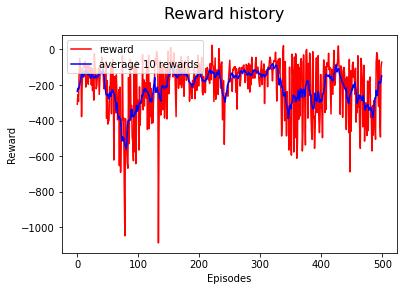

In [11]:
hist = problem.get_histogram_metrics()
history_utils.plot_reward_hist(hist, 10)

In [ ]:
!tensorboard --logdir=tensorboard_logs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
